<a href="https://colab.research.google.com/github/JanakiRamanT17/Data-Scientist-Trainee-Project/blob/main/Project_3_Stock_Price_Forecasting_(Time_Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

**Load Dataset**

In [2]:
df = pd.read_csv("stock_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df.head()

,Close
Date,
2023-01-01,100.50
2023-01-02,100.36
2023-01-03,101.01
2023-01-04,102.53
2023-01-05,102.30


**Plot Stock Trend**

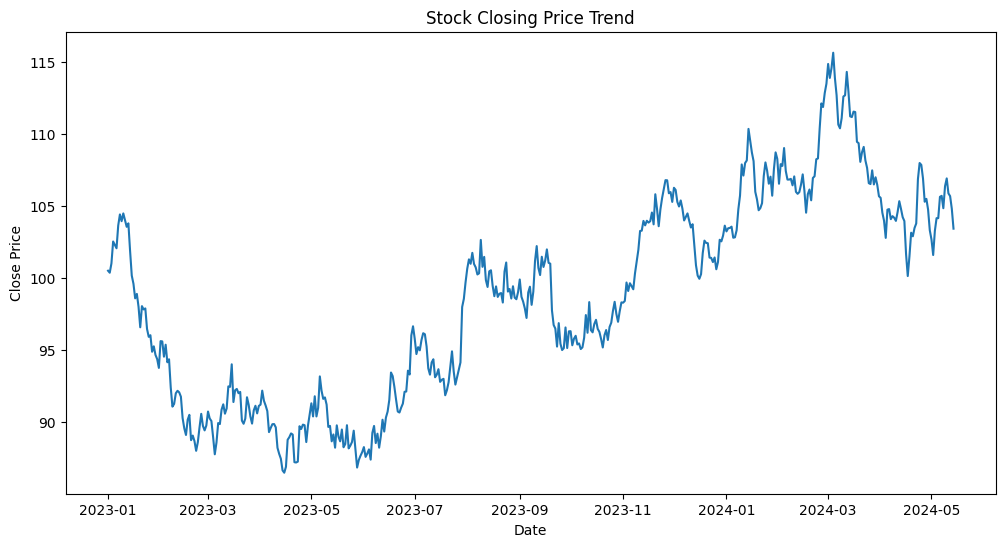

In [3]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title("Stock Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

**Add Moving Averages**

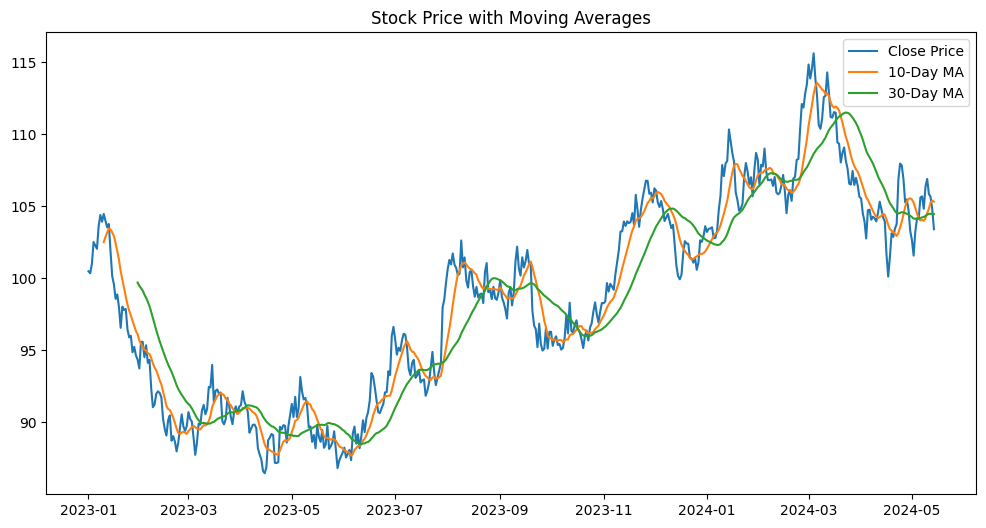

In [4]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_10'], label='10-Day MA')
plt.plot(df['MA_30'], label='30-Day MA')
plt.legend()
plt.title("Stock Price with Moving Averages")
plt.show()

**Train-Test Split**

In [5]:
train = df[:-30]
test = df[-30:]

**Fit ARIMA Model**

In [6]:
model = ARIMA(train['Close'], order=(5,1,0))
model_fit = model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


**Forecast Next 30 Days**

In [7]:
forecast = model_fit.forecast(steps=30)

**Compare Forecast vs Actual**

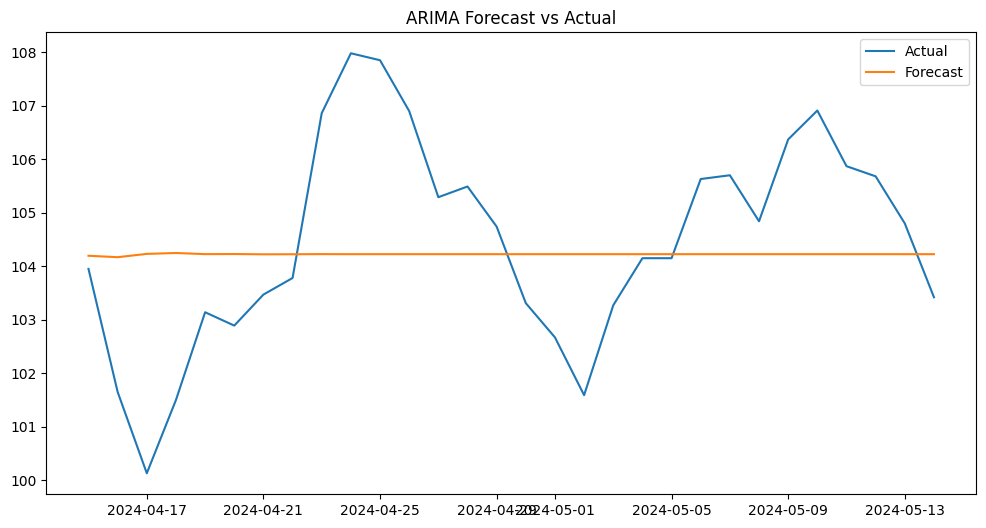

In [8]:
plt.figure(figsize=(12,6))
plt.plot(test.index, test['Close'], label='Actual')
plt.plot(test.index, forecast, label='Forecast')
plt.legend()
plt.title("ARIMA Forecast vs Actual")
plt.show()

**Evaluation Metrics**

In [9]:
mae = mean_absolute_error(test['Close'], forecast)
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1.5926836866543932
RMSE: 1.9329614079093151
